# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

%matplotlib inline

## 1. Iris dataset

### 1.1. k-means Clustering

In [2]:
## Load iris dataset
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

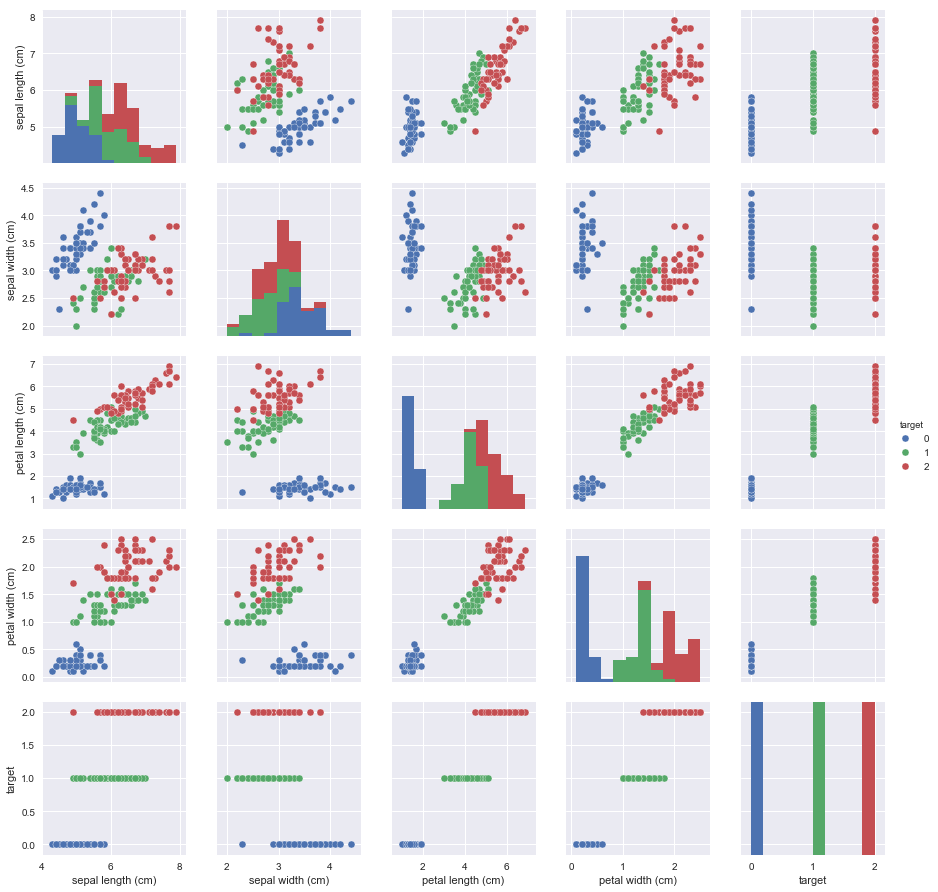

In [6]:
## Make iris dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = iris.target

## Plot iris data with seaborn
sns.pairplot(data, hue = 'target')
plt.show()

In [7]:
X = iris.data
y = iris.target

In [8]:
KMeans?

In [9]:
k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('KMeans_with_k=%d' % k)
    # Call model
    model = KMeans(n_clusters = k, max_iter = 30, n_init = 10, verbose = 1, n_jobs = 1)
#     models.append(model)
    # Get cluster IDs 
#     model.fit(X)
#     result = model.predict(X)
    result = model.fit_predict(X)
    
    models.append(model)
    results.append(result)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric = 'euclidean'))
    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(y, result))

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 153.394343434
start iteration
done sorting
end inner loop
Iteration 1, inertia 152.368706477
start iteration
done sorting
end inner loop
Iteration 2, inertia 152.368706477
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 410.85856998
start iteration
done sorting
end inner loop
Iteration 1, inertia 261.208885281
start iteration
done sorting
end inner loop
Iteration 2, inertia 180.905276409
start iteration
done sorting
end inner loop
Iteration 3, inertia 155.091827751
start iteration
done sorting
end inner loop
Iteration 4, inertia 152.368706477
start iteration
done sorting
end inner loop
Iteration 5, inertia 152.368706477
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 153.394343434
start iteration
done sortin

start iteration
done sorting
end inner loop
Iteration 0, inertia 55.1456285714
start iteration
done sorting
end inner loop
Iteration 1, inertia 53.1186701591
start iteration
done sorting
end inner loop
Iteration 2, inertia 52.0736720874
start iteration
done sorting
end inner loop
Iteration 3, inertia 51.2781288072
start iteration
done sorting
end inner loop
Iteration 4, inertia 51.048366607
start iteration
done sorting
end inner loop
Iteration 5, inertia 51.048366607
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 54.6191652238
start iteration
done sorting
end inner loop
Iteration 1, inertia 51.8586926326
start iteration
done sorting
end inner loop
Iteration 2, inertia 48.8640408246
start iteration
done sorting
end inner loop
Iteration 3, inertia 47.5364646998
start iteration
done sorting
end inner loop
Iteration 4, inertia 46.8942076441
start iteration
done sorting
end inner loop
Iteration

end inner loop
Iteration 7, inertia 33.3921675579
start iteration
done sorting
end inner loop
Iteration 8, inertia 33.319192959
start iteration
done sorting
end inner loop
Iteration 9, inertia 33.319192959
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37.7126640693
start iteration
done sorting
end inner loop
Iteration 1, inertia 36.9512544054
start iteration
done sorting
end inner loop
Iteration 2, inertia 36.8251115483
start iteration
done sorting
end inner loop
Iteration 3, inertia 36.7616512308
start iteration
done sorting
end inner loop
Iteration 4, inertia 36.6323517802
start iteration
done sorting
end inner loop
Iteration 5, inertia 36.6323517802
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 35.8481321005
start iteration
done sorting
end inner loop
Iteration 1, inertia 33.2932068324
st

In [10]:
silhouette_scores = pd.Series(silhouette_scores, index = names)
mutual_scores = pd.Series(mutual_scores, index = names)

In [11]:
silhouette_scores

KMeans_with_k=2    0.680814
KMeans_with_k=3    0.552592
KMeans_with_k=4    0.497826
KMeans_with_k=5    0.489743
KMeans_with_k=6    0.364087
KMeans_with_k=7    0.360233
KMeans_with_k=8    0.363120
KMeans_with_k=9    0.333784
dtype: float64

In [12]:
mutual_scores

KMeans_with_k=2    0.519361
KMeans_with_k=3    0.748372
KMeans_with_k=4    0.646896
KMeans_with_k=5    0.592366
KMeans_with_k=6    0.515865
KMeans_with_k=7    0.516283
KMeans_with_k=8    0.497598
KMeans_with_k=9    0.468559
dtype: float64

Clustering의 평가 방법으로 상당히 많은 것들이 존재합니다. 자세한 내용은 scikit-learn 공식 홈페이지 [Link](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)를 참고해주세요.

### 1.2. Hierarchical Agglomerative Clustering

In [13]:
k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('HC_k=%d' % k)
    # Call model
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
#     models.append(model)
    # Get cluster IDs 
    result = model.fit_predict(X)
    models.append(model)
    results.append(result)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric = 'euclidean'))
    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(y, result))

In [14]:
silhouette_scores = pd.Series(silhouette_scores, index = names)
mutual_scores = pd.Series(mutual_scores, index = names)

In [15]:
silhouette_scores

HC_k=2    0.686393
HC_k=3    0.554097
HC_k=4    0.488740
HC_k=5    0.484155
HC_k=6    0.361885
HC_k=7    0.344854
HC_k=8    0.346241
HC_k=9    0.333139
dtype: float64

In [16]:
mutual_scores

HC_k=2    0.576771
HC_k=3    0.757803
HC_k=4    0.636404
HC_k=5    0.571033
HC_k=6    0.492795
HC_k=7    0.472473
HC_k=8    0.452586
HC_k=9    0.432991
dtype: float64

- scikit-learn 내에 있는 AgglomerativeClustering은 dendrogram을 지원하지 않습니다.
- scipy를 활용하여 그림을 그려봅시다.

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [19]:
Z.shape

(149, 4)

In [20]:
Z[0:5]

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  7.00000000e+00,   3.90000000e+01,   1.00000000e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.70000000e+01,   1.00000000e-01,
          2.00000000e+00]])

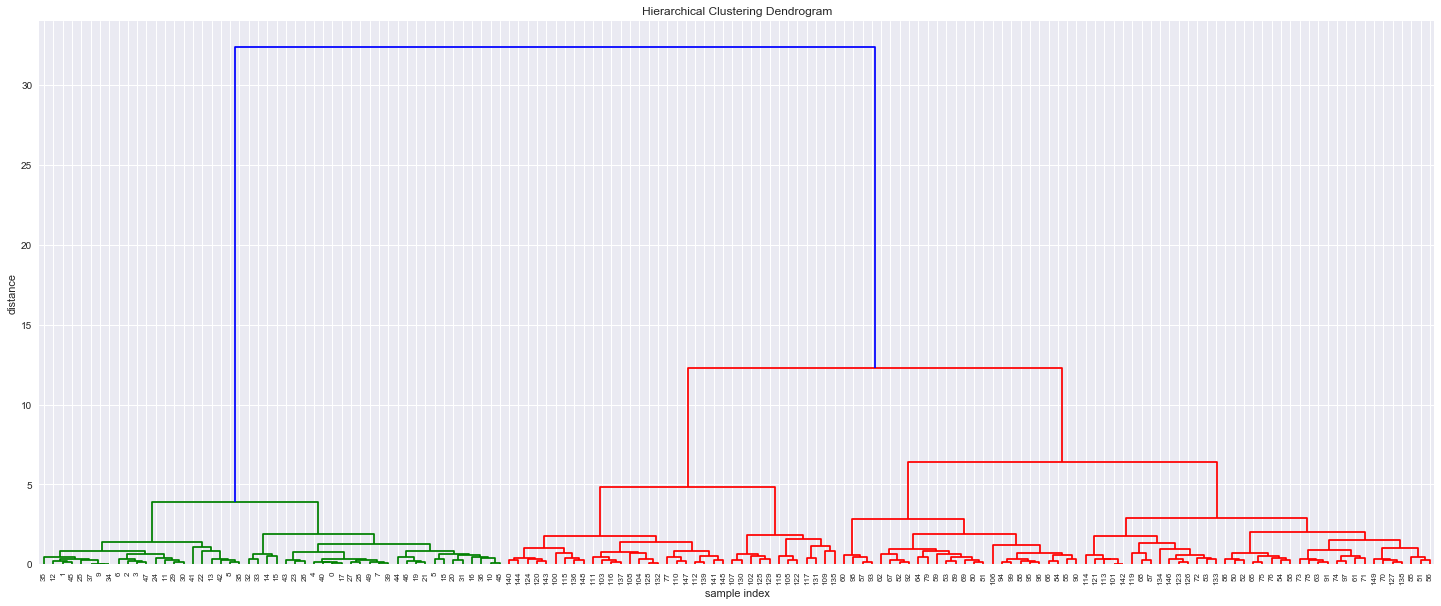

In [21]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    
)
plt.show()

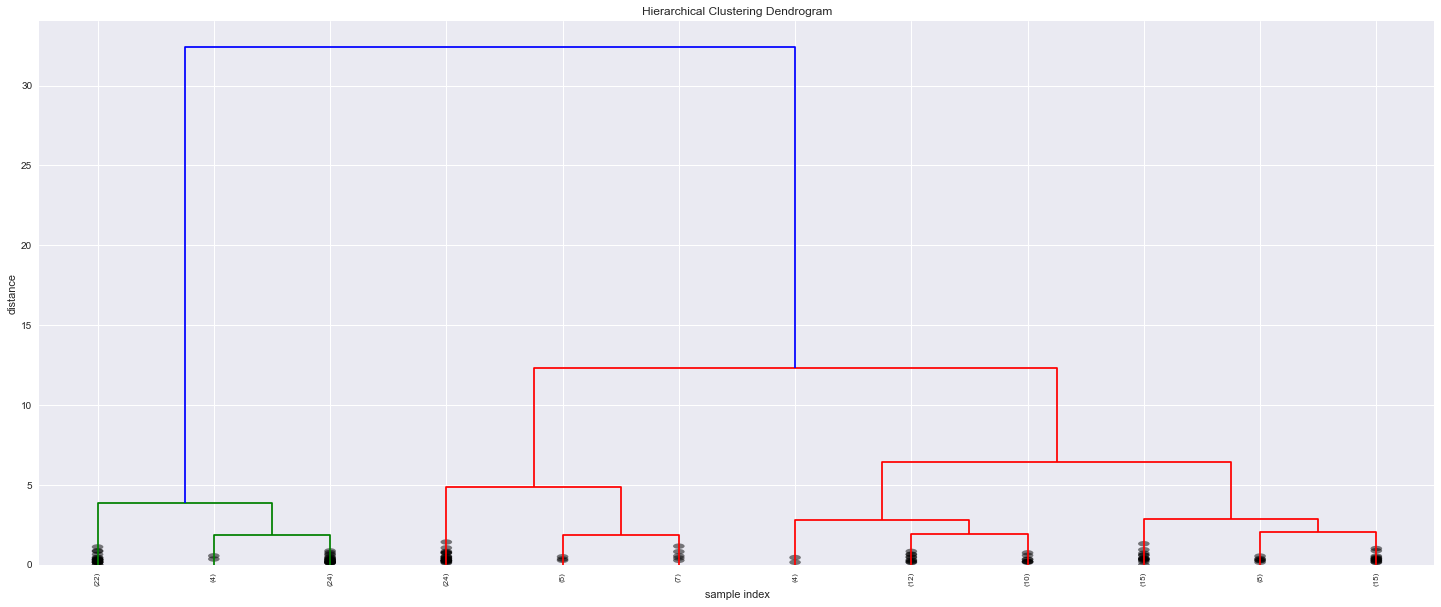

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted = True
)
plt.show()

Use `fancy_dendrogram` function in [this page](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

In [23]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

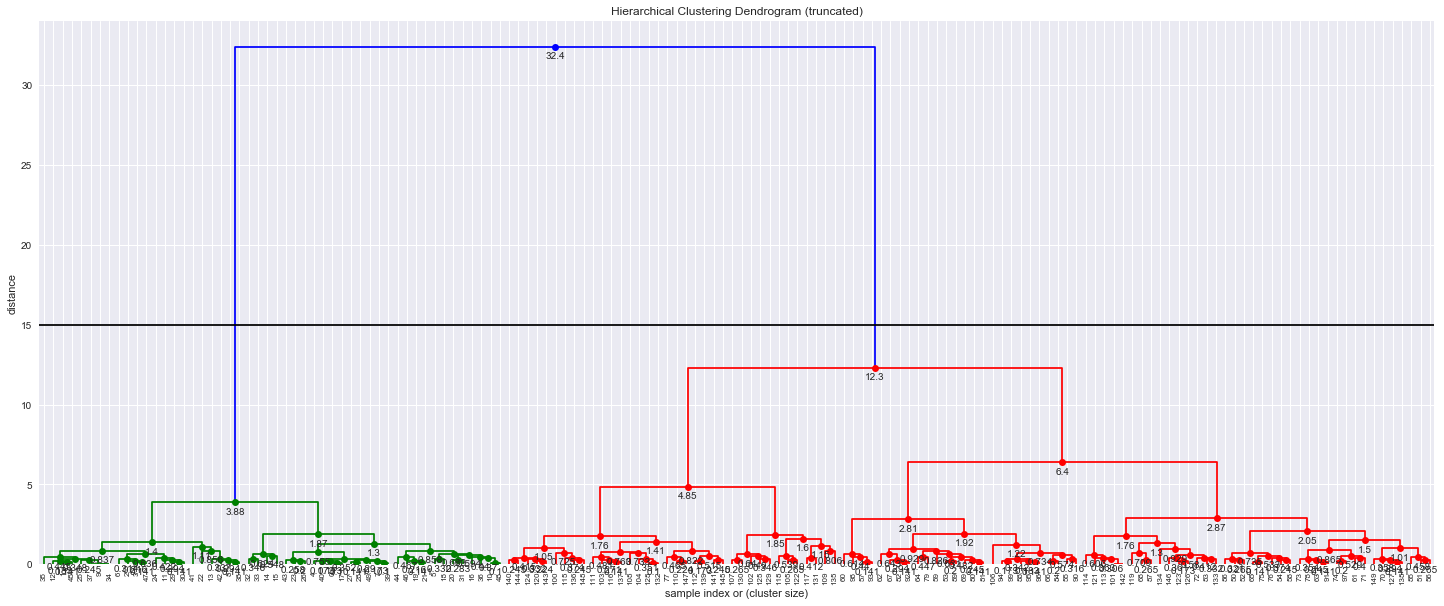

In [24]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    max_d = 15
)
plt.show()

### 1.2. Comparison of the  `KMeans` and `MiniBatchKMeans`
-  http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

In [25]:
## Generate sample data
np.random.seed(1234)
centers = [[1,1], [-1,-1], [1,-1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std = 0.7)

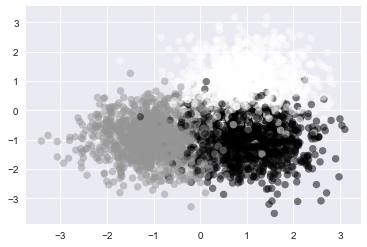

In [26]:
## Scatter plot
plt.scatter(X[:,0], X[:,1], c = labels_true, alpha = 0.5)

In [27]:
## Construct clusters with KMeans
k_means = KMeans(init='k-means++',
                 n_clusters=3,
                 n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [28]:
print(t_batch)

0.04011797904968262


In [29]:
## Construct clusters with MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++',
                      n_clusters=3,
                      batch_size=45,
                      n_init=10,
                      max_no_improvement=10,
                      verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [30]:
print(t_mini_batch)

0.021502971649169922


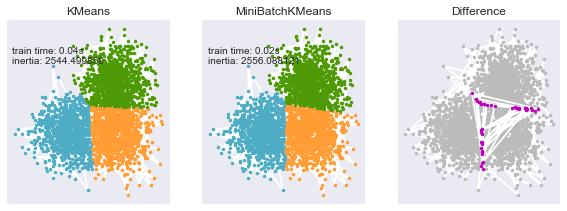

In [31]:
## Plot result
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## 참고 (in official website of `scikit-learn`)
- Comparing different clustering algorithms on toy datasets: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)
-  Empirical evaluation of the impact of k-means initialization: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html)